In [1]:
from sys import path
from os.path import relpath, realpath, abspath, join, exists
from itertools import product

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

pd.set_option('display.max_rows', 999)

In [2]:
from torchnetjson.builder import build_net

In [3]:
from thesis_v2 import dir_dict
from thesis_v2.data import load_data_helper
from thesis_v2.training.training_aux import load_training_results
from thesis_v2.training_extra.misc import count_params
from thesis_v2.models.maskcnn_polished_with_local_pcn.builder import load_modules

load_modules()

In [4]:
folder_to_check = 'scripts/training/yuanyuan_8k_a_3day/maskcnn_polished_with_local_pcn_legacy_bn'
path.insert(0, join(dir_dict['root'], folder_to_check))
from submit_certain_configs import param_iterator_obj
from key_utils import keygen

In [5]:
def load_everything():
    _df_collect = []
    for idx, param in enumerate(param_iterator_obj.generate()):
        if idx % 50 == 0:
            print(idx)
            
#         print(len(param))
        
        assert len(param) == 23
        assert param['split_seed'] == 'legacy'
        assert param['out_channel'] == 16
        assert param['num_layer'] == 2
        assert param['kernel_size_l1'] == 9
        assert param['pooling_ksize'] == 3
        assert param['pooling_type'] == 'avg'
        
#         assert param['model_seed'] == 0
        
        key = keygen(**{k: v for k, v in param.items() if k not in {'scale', 'smoothness'}})
#         print(key)
        # 10 to go.
        result = load_training_results(key, return_model=False)
        # load twice, first time to get the model.
        result = load_training_results(key, return_model=True, model=build_net(result['config_extra']['model']))
        num_epochs = [len(x) for x in result['stats_all']]
        _df_collect.append(
            {
#                 'split_seed': str(param['split_seed']),
                
                
                'act_fn': param['act_fn'],
                'bn_before_act': param['bn_before_act'],
                'bn_after_fc': param['bn_after_fc'],
                'input_size': param['input_size'],
                'loss_type': param['loss_type'],
                
                # 12 to go
                
                'scale': float(param['scale']),
                # 
                'smoothness': float(param['smoothness']),
                # 
                
                # 8 to go
                'pcn_bn': param['pcn_bn'],
                'pcn_bn_post': param['pcn_bn_post'],
                'pcn_bypass': param['pcn_bypass'],
                'pcn_final_act': param['pcn_final_act'],
                'pcn_no_act': param['pcn_no_act'],
                'pcn_bias': param['pcn_bias'],
                
                'pcn_cls': param['pcn_cls'],
                
                'model_seed': param['model_seed'],
                
                'corr_test': result['stats_best']['stats']['test']['corr_mean'],
                'max_epoch': max(num_epochs),
                'num_param': count_params(result['model']),
            }
        )
        _df =  pd.DataFrame(_df_collect, columns=[
#             'split_seed',
            'act_fn', 'bn_before_act', 'bn_after_fc',
            'input_size', 'loss_type', 'scale',
            'smoothness',
            
            'pcn_bn', 'pcn_bn_post', 'pcn_bypass', 'pcn_final_act', 'pcn_no_act', 'pcn_bias', 'pcn_cls',
            'model_seed',
            
            'corr_test', 'num_param',
            'max_epoch',
            
                                                 ])
        _df = _df.set_index([
            'act_fn', 'bn_before_act', 'bn_after_fc',
            'input_size', 'loss_type', 'scale',
            'smoothness',
            'pcn_bn', 'pcn_bn_post', 'pcn_bypass', 'pcn_final_act', 'pcn_no_act', 'pcn_bias', 'pcn_cls',
            'model_seed',
        ],verify_integrity=True)
    return _df

In [6]:
df = load_everything()

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150


In [7]:
corr_mean = df['corr_test'].unstack('model_seed').mean(axis=1)
corr_std = df['corr_test'].unstack('model_seed').std(axis=1)

In [8]:
corr_mean.unstack('pcn_cls')

pcn_cls                                                                                                                                          0  \
act_fn   bn_before_act bn_after_fc input_size loss_type scale smoothness pcn_bn pcn_bn_post pcn_bypass pcn_final_act pcn_no_act pcn_bias             
relu     True          False       50         mse       0.01  0.000005   False  False       False      False         False      True      0.487800   
                                                                                                       True          False      True      0.488588   
                                                                                True        False      False         False      True      0.512897   
                                                                                                       True          False      True      0.508339   
                                                                         True   False       False      False         False      True      0.501856   
                                                                                                       True          False      True      0.501856   
                                                                                True        False      False         False      True      0.514573   
                                                                                                       True          False      True      0.515880   
                                              poisson   0.01  0.000005   False  False       False      False         False      True      0.461103   
                                                                                                       True          False      True      0.464499   
                                                                                True        False      False         False      True      0.499733   
                                                                                                       True          False      True      0.505144   
                                                                         True   False       False      False         False      True      0.487047   
                                                                                                       True          False      True      0.484249   
                                                                                True        False      False         False      True      0.508336   
                                                                                                       True          False      True      0.513155   
                                   100        mse       0.01  0.000005   False  False       False      False         False      True      0.404229   
                                                                                                       True          False      True      0.404229   
                                                                                True        False      False         False      True      0.528247   
                                                                                                       True          False      True      0.522027   
                                                                         True   False       False      False         False      True      0.406812   
                                                                                                       True          False      True      0.406812   
                                                                                True        False      False         False      True      0.526476   
                                                                                                       True          False      True      0.531865   
                                              poisson   0.01  0.000005   False  False       False   

In [9]:
corr_std.unstack('pcn_cls')

pcn_cls                                                                                                                                          0  \
act_fn   bn_before_act bn_after_fc input_size loss_type scale smoothness pcn_bn pcn_bn_post pcn_bypass pcn_final_act pcn_no_act pcn_bias             
relu     True          False       50         mse       0.01  0.000005   False  False       False      False         False      True      0.007960   
                                                                                                       True          False      True      0.008841   
                                                                                True        False      False         False      True      0.001248   
                                                                                                       True          False      True      0.003563   
                                                                         True   False       False      False         False      True      0.003799   
                                                                                                       True          False      True      0.003799   
                                                                                True        False      False         False      True      0.001507   
                                                                                                       True          False      True      0.001428   
                                              poisson   0.01  0.000005   False  False       False      False         False      True      0.003455   
                                                                                                       True          False      True      0.009257   
                                                                                True        False      False         False      True      0.009433   
                                                                                                       True          False      True      0.009897   
                                                                         True   False       False      False         False      True      0.011585   
                                                                                                       True          False      True      0.012234   
                                                                                True        False      False         False      True      0.008677   
                                                                                                       True          False      True      0.003373   
                                   100        mse       0.01  0.000005   False  False       False      False         False      True      0.001711   
                                                                                                       True          False      True      0.001711   
                                                                                True        False      False         False      True      0.006792   
                                                                                                       True          False      True      0.007807   
                                                                         True   False       False      False         False      True      0.017632   
                                                                                                       True          False      True      0.017632   
                                                                                True        False      False         False      True      0.002620   
                                                                                                       True          False      True      0.002073   
                                              poisson   0.01  0.000005   False  False       False   

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

def scatter(x, y, xlabel, ylabel, title):
    
    # only check high performing cases.
    selector = np.logical_and(x>=0.5, y>=0.5)
    x=x[selector]
    y=y[selector]
    
    plt.close('all')
    plt.figure(figsize=(6, 5))
    plt.scatter(x, y, s=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axis('equal')
    plt.xlim(0.5,0.55)
    plt.ylim(0.5,0.55)
    plt.plot([0,1],[0,1],linestyle='--')
    plt.title(title)
    plt.show()
    print('y-x mean', (y-x).mean(), 'y-x>0 mean', ((y-x)>0).mean())
    print('y top', y.max(), 'x top', x.max())

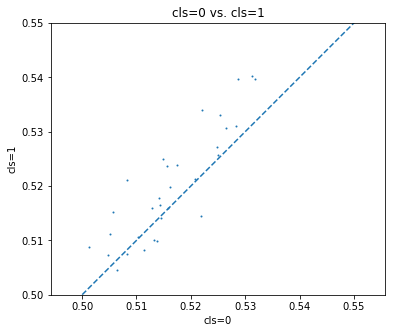

y-x mean 0.0036780161242331226 y-x>0 mean 0.7741935483870968
y top 0.5403151710828146 x top 0.5318654378255209


In [11]:
scatter(corr_mean.unstack('pcn_cls').values[:,0], corr_mean.unstack('pcn_cls').values[:,1], 'cls=0', 'cls=1', 'cls=0 vs. cls=1')

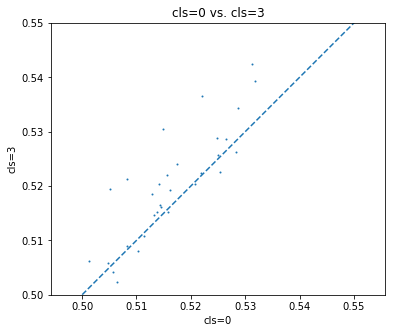

y-x mean 0.003770885288074437 y-x>0 mean 0.7419354838709677
y top 0.5424907803535461 x top 0.5318654378255209


In [12]:
scatter(corr_mean.unstack('pcn_cls').values[:,0], corr_mean.unstack('pcn_cls').values[:,3], 'cls=0', 'cls=3', 'cls=0 vs. cls=3')

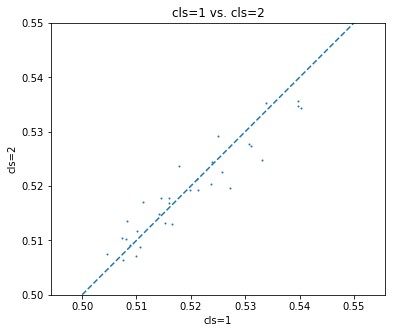

y-x mean -0.0005642020454009467 y-x>0 mean 0.5
y top 0.5356818437576294 x top 0.5403151710828146


In [13]:
scatter(corr_mean.unstack('pcn_cls').values[:,1], corr_mean.unstack('pcn_cls').values[:,2], 'cls=1', 'cls=2', 'cls=1 vs. cls=2')

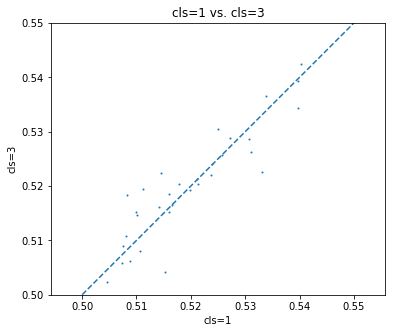

y-x mean 0.0004074169943729909 y-x>0 mean 0.53125
y top 0.5424907803535461 x top 0.5403151710828146


In [14]:
scatter(corr_mean.unstack('pcn_cls').values[:,1], corr_mean.unstack('pcn_cls').values[:,3], 'cls=1', 'cls=3', 'cls=1 vs. cls=3')

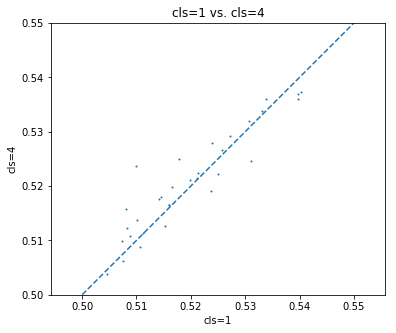

y-x mean 0.001140437399347615 y-x>0 mean 0.6875
y top 0.537368635336558 x top 0.5403151710828146


In [15]:
scatter(corr_mean.unstack('pcn_cls').values[:,1], corr_mean.unstack('pcn_cls').values[:,4], 'cls=1', 'cls=4', 'cls=1 vs. cls=4')

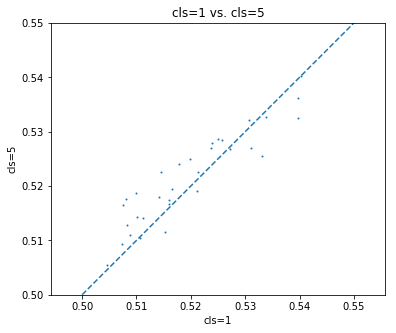

y-x mean 0.001847777205208942 y-x>0 mean 0.6875
y top 0.5402571757634481 x top 0.5403151710828146


In [16]:
scatter(corr_mean.unstack('pcn_cls').values[:,1], corr_mean.unstack('pcn_cls').values[:,5], 'cls=1', 'cls=5', 'cls=1 vs. cls=5')

In [17]:
def plot_step_increase(pairs_to_check):
    # remove those no innner act ones.
    df_unstacked = corr_mean.unstack('pcn_cls')
#     df_unstacked = corr_mean.unstack('pcn_cls')
    print(df_unstacked.shape)
    
    selector = df_unstacked.values[:,0] >= 0.50
#     selector = ()
    print(selector.mean())
    
    cls_values = df_unstacked.columns.values.tolist()
    print(cls_values)
    assert cls_values == list(range(len(cls_values)))
    
    for p1, p2 in pairs_to_check:
        val0 = df_unstacked.values[:,p1][selector]
        val1 = df_unstacked.values[:,p2][selector]

        # selection
        
        print(f'{p2} - {p1}', 'mean', (val1-val0).mean(), 'std', (val1-val0).std())
# trend for 0-1-2 is good. then bad.
plot_step_increase([(0,1),(1,2),(2,3),(3,5),(2,5)])

(64, 6)
0.515625
[0, 1, 2, 3, 4, 5]
1 - 0 mean 0.002533735650958437 std 0.006665180527704943
2 - 1 mean -0.0008034432175183633 std 0.003452083775143502
3 - 2 mean 0.0007216918348061862 std 0.0037334189897795587
5 - 3 mean 0.0015874276257524765 std 0.0035012132299076923
5 - 2 mean 0.002309119460558663 std 0.003835493869654583


In [18]:
corr_mean.unstack('pcn_cls')

pcn_cls                                                                                                                                          0  \
act_fn   bn_before_act bn_after_fc input_size loss_type scale smoothness pcn_bn pcn_bn_post pcn_bypass pcn_final_act pcn_no_act pcn_bias             
relu     True          False       50         mse       0.01  0.000005   False  False       False      False         False      True      0.487800   
                                                                                                       True          False      True      0.488588   
                                                                                True        False      False         False      True      0.512897   
                                                                                                       True          False      True      0.508339   
                                                                         True   False       False      False         False      True      0.501856   
                                                                                                       True          False      True      0.501856   
                                                                                True        False      False         False      True      0.514573   
                                                                                                       True          False      True      0.515880   
                                              poisson   0.01  0.000005   False  False       False      False         False      True      0.461103   
                                                                                                       True          False      True      0.464499   
                                                                                True        False      False         False      True      0.499733   
                                                                                                       True          False      True      0.505144   
                                                                         True   False       False      False         False      True      0.487047   
                                                                                                       True          False      True      0.484249   
                                                                                True        False      False         False      True      0.508336   
                                                                                                       True          False      True      0.513155   
                                   100        mse       0.01  0.000005   False  False       False      False         False      True      0.404229   
                                                                                                       True          False      True      0.404229   
                                                                                True        False      False         False      True      0.528247   
                                                                                                       True          False      True      0.522027   
                                                                         True   False       False      False         False      True      0.406812   
                                                                                                       True          False      True      0.406812   
                                                                                True        False      False         False      True      0.526476   
                                                                                                       True          False      True      0.531865   
                                              poisson   0.01  0.000005   False  False       False   